**Reading the Data**

In [96]:
import pandas as pd

In [97]:
data = pd.read_csv('Churn_Modelling.csv')

In [98]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Information about the data set**

In [100]:
print(data.shape)
print("Number of rows is",data.shape[0])
print("Number of columns is",data.shape[1])

(10000, 14)
Number of rows is 10000
Number of columns is 14


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [102]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [103]:
data.describe()
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**DROPPING COLUMNS THAT DONT INFLUENCE THE CHURNING**

In [104]:
data=data.drop(['CustomerId','RowNumber','Surname'],axis=1)

**SEPERATING THE THREE COUNTRIES VALUE IN THE DATASET**

In [105]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [106]:
data=pd.get_dummies(data)
print(data.head())
data.shape

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1              True   
1               1        112542.58       0             False   
2               0        113931.57       1              True   
3               0         93826.63       0              True   
4               1         79084.10       0             False   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0              False            False           True        False  
1              False             True           True        False  
2 

(10000, 14)

**PLOTTING A BAR CHART FOR THE NUMBER OF CUSTOMERS TAHT HAVE LEFT**

In [107]:
import matplotlib.pyplot as plt

Exited
0    7963
1    2037
Name: count, dtype: int64


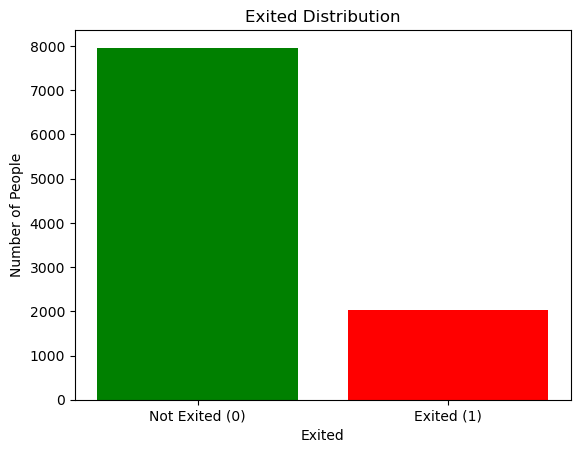

In [108]:
exit_counts = data['Exited'].value_counts()
print(exit_counts)

plt.bar(exit_counts.index, exit_counts.values, color=['green', 'red'])
plt.xlabel('Exited')
plt.ylabel('Number of People')
plt.title('Exited Distribution')
plt.xticks(exit_counts.index, ['Not Exited (0)', 'Exited (1)'])
plt.show()

**SPLITTING THE TRAIN AND TEST DATA**

In [109]:
x=data.drop('Exited',axis=1)
y=data['Exited']
print(x)
print(y)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  1        101348.88              True              

In [110]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

**TRAINING THE MODEL IGNORING THE IMBALANCE**

In [183]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [184]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_test)

[[-0.68073539 -0.27993196  0.68472287 ... -0.57773517 -0.90750738
   0.90750738]
 [-1.30191518 -0.5649346  -0.35097064 ... -0.57773517 -0.90750738
   0.90750738]
 [-0.97061929  0.10007155 -0.35097064 ...  1.73089688  1.10191942
  -1.10191942]
 ...
 [-1.39509214  0.7650777   1.3751852  ... -0.57773517  1.10191942
  -1.10191942]
 [ 0.39597623  0.00507067  0.68472287 ... -0.57773517 -0.90750738
   0.90750738]
 [ 1.02750901 -0.5649346  -1.04143297 ... -0.57773517 -0.90750738
   0.90750738]]


In [185]:
 from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
    

In [186]:
log.fit(X_train,Y_train)

LogisticRegression()

In [187]:
y_pred1 = log.predict(X_test)
print(y_pred1)

[0 0 0 ... 1 0 0]


In [188]:
from sklearn.metrics import accuracy_score

In [189]:
accuracy_score(Y_test,y_pred1)

0.808

In [190]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [191]:
print(precision_score(Y_test,y_pred1))
print(recall_score(Y_test,y_pred1))
print(f1_score(Y_test,y_pred1))

0.5891472868217055
0.18673218673218672
0.2835820895522388


**Handling imbanace data with SMOTE**

In [204]:
from imblearn.over_sampling import SMOTE

In [205]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [206]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [207]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

**Splitting the dataset into the training set and test set**

In [208]:
 from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

**Feature Scaling**

In [210]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [211]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [212]:
X_train

array([[ 0.45827016, -0.80315147, -1.03048306, ..., -0.63720156,
         0.84456303, -1.23238879],
       [ 1.08997191,  0.09972953, -1.39766867, ..., -0.63720156,
        -1.18404425,  0.81143224],
       [ 0.64342412,  1.00261053,  0.80544497, ..., -0.63720156,
         0.84456303,  0.81143224],
       ...,
       [ 0.19687633,  0.20004964,  1.17263058, ..., -0.63720156,
        -1.18404425,  0.81143224],
       [ 0.88303513,  1.00261053,  1.17263058, ..., -0.63720156,
         0.84456303, -1.23238879],
       [ 0.52361862,  1.00261053, -1.39766867, ..., -0.63720156,
        -1.18404425,  0.81143224]])

**Logistics Regression**

In [130]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [131]:
log.fit(X_train,y_train)

LogisticRegression()

In [132]:
y_pred1 = log.predict(X_test)
print(y_pred1)

[0 1 0 ... 1 1 1]


In [133]:
accuracy_score(y_test,y_pred1)

0.8367859384808537

In [134]:
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.8800588668138337
0.7701223438506117
0.8214285714285715


**SVC**

In [135]:
from sklearn import svm

In [136]:
svm=svm.SVC()

In [137]:
svm.fit(X_train,y_train)

SVC()

In [138]:
y_pred2=svm.predict(X_test)

In [139]:
accuracy_score(y_test,y_pred2)

0.8854362837413685

In [140]:
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.9291907514450867
0.8280746941403735
0.8757235274089207


**KNeighbors Classifier**

In [141]:
from sklearn.neighbors import KNeighborsClassifier
kns=KNeighborsClassifier()

In [142]:
kns.fit(X_train,y_train)

KNeighborsClassifier()

In [143]:
y_pred3=kns.predict(X_test)

In [144]:
accuracy_score(y_test,y_pred3)

0.8653483992467044

In [145]:
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.8797297297297297
0.8383773341918866
0.8585558852621168


**Decision Tree Classifier**

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [147]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [148]:
y_pred4=dt.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred4)

0.8436911487758946

In [150]:
print(precision_score(y_test,y_pred4))
print(recall_score(y_test,y_pred4))
print(f1_score(y_test,y_pred4))

0.8250154035736291
0.8622021893110109
0.843198992443325


**Random Forest Classifier**

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [152]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [153]:
y_pred5=rf.predict(X_test)

In [154]:
accuracy_score(y_test,y_pred5)

0.8970495919648462

In [155]:
print(precision_score(y_test,y_pred5))
print(recall_score(y_test,y_pred5))
print(f1_score(y_test,y_pred5))

0.9048248512888302
0.8815196394075981
0.8930202217873451


**Gradient Boosing Classifier**

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [157]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [158]:
y_pred6=gbc.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred6)
print(y_test)

6126     0
7093     1
1659     0
15727    1
9682     0
        ..
11031    1
9747     1
5912     0
2879     1
14259    1
Name: Exited, Length: 3186, dtype: int64


In [160]:
print(precision_score(y_test,y_pred6))
print(recall_score(y_test,y_pred6))
print(f1_score(y_test,y_pred6))

0.905712319339298
0.8473921442369607
0.8755821689953427


**CHOOSING THE MOST ACCURATE MODEL**

In [161]:
accuracy_data=pd.DataFrame({'Model':['LR','SVC','KNN','DT','RF','GBC'],
                                     'Accuracy':[accuracy_score(y_test,y_pred1),
                                     accuracy_score(y_test,y_pred2),
                                     accuracy_score(y_test,y_pred3),
                                     accuracy_score(y_test,y_pred4),
                                     accuracy_score(y_test,y_pred5),
                                     accuracy_score(y_test,y_pred6)]})

In [162]:
print(accuracy_data)

  Model  Accuracy
0    LR  0.836786
1   SVC  0.885436
2   KNN  0.865348
3    DT  0.843691
4    RF  0.897050
5   GBC  0.882611


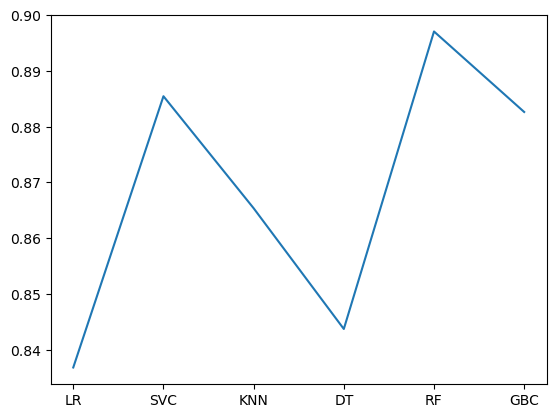

In [163]:
plt.plot(accuracy_data['Model'],accuracy_data['Accuracy'])

**Saving The Model**

In [164]:
x_res=sc.fit_transform(x_res) 

In [165]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [166]:
import joblib

In [167]:
joblib.dump(rf,'Bank_Churn_Model')

['Bank_Churn_Model']

In [168]:
model=joblib.load('Bank_Churn_Model')

**MODDEL PREDICTOR WITHOUT GUI**

In [171]:
print("Enter the details of the customer to predict churn or not:")
cs=int(input("Credit score: "))
age=int(input("Age: "))
te=int(input("Tenure: "))
bal=int(input("Enter the balance: "))
np=int(input("Number of Products: "))
cd=int(input("Has credit card 1=yes 0=no: "))
am=int(input("Active member 1=yes 0=no: "))
sal=int(input("Estimated Salary: "))
fr=int(input("In France? 1=yes 0=no: "))
gr=int(input("In Gremany 1=yes 0=no: "))
sp=int(input("In Spain 1=yes 0=no: "))
fm=int(input("Female? 1=yes 0=no: "))
ml=int(input("Male? 1=yes 0=no: "))

Enter the details of the customer to predict churn or not:
Credit score: 808
Age: 45
Tenure: 7
Enter the balance: 118626
Number of Products: 2
Has credit card 1=yes 0=no: 1
Active member 1=yes 0=no: 0
Estimated Salary: 147132
In France? 1=yes 0=no: 1
In Gremany 1=yes 0=no: 0
In Spain 1=yes 0=no: 0
Female? 1=yes 0=no: 0
Male? 1=yes 0=no: 1


In [172]:
model.predict([[cs,age,te,bal,np,cd,am,sal,fr,gr,sp,fm,ml]])

array([1], dtype=int64)

**GUI FOR THE PREDICTIVE MODEL**

In [ ]:
from tkinter import *
import tkinter as tk
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
import tkinter as tk
from tkinter import Entry, Label, Button
import joblib

def show_entry_fields(entries):
    # Access the values from Entry widgets
    values = [int(entry.get()) for entry in entries]

    # Load the pre-trained machine learning model
    model = joblib.load('Bank_Churn_Model')

    # Use the model to predict
    result = model.predict([values])

    # Display the result
    result_label.config(text=f"Prediction: {result}")

# Create the main window
root = tk.Tk()
root.title("Bank Churn Prediction")

# Create Entry widgets
labels = ["Credit score: ", "Age: ", "Tenure: ", "Number of Products: ","Balance: ", "Has credit card 1=yes 0=no: ", 
          "Active member 1=yes 0=no: ", "Estimated Salary: ", "In France? 1=yes 0=no: ", "In Germany 1=yes 0=no: ",
          "In Spain 1=yes 0=no: ", "Female? 1=yes 0=no: ", "Male? 1=yes 0=no: "]

entries = []
for i, label_text in enumerate(labels):
    label = Label(root, text=label_text)
    label.grid(row=i, column=0, padx=10, pady=5, sticky="e")

    entry = Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Create a button to trigger the prediction
submit_button = Button(root, text="Predict", command=lambda: show_entry_fields(entries))
submit_button.grid(row=len(labels), column=0, columnspan=2, pady=10)

# Create a label to display the prediction result
result_label = Label(root, text="")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2, pady=10)

# Start the GUI event loop
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import Entry, Label, Button, PhotoImage
import joblib
from PIL import Image

# Create the main window
root = tk.Tk()
root.title("Bank Churn Prediction")


# Load the JPEG image
jpeg_image_path = "Bank.jpg"
image = Image.open(jpeg_image_path)

# Save it as a GIF image
gif_image_path = "Bank.gif"
image.save(gif_image_path, "GIF")

# Use the GIF image in Tkinter
background_image = PhotoImage(file=gif_image_path)

def show_entry_fields(entries, result_label):
    # Access the values from Entry widgets
    values = [int(entry.get()) for entry in entries]

    # Load the pre-trained machine learning model
    model = joblib.load('Bank_Churn_Model')

    # Use the model to predict
    result = model.predict([values])

    # Display the result
    result_label.config(text=f"Prediction: {result}", font=("Helvetica", 14, "bold"), fg="blue")



# Add a background image (you need to have an image file)
background_image = PhotoImage(file=gif_image_path)
background_label = tk.Label(root, image=background_image)
background_label.place(relwidth=1, relheight=1)


# Create Entry widgets
labels = ["Credit score:", "Age:", "Tenure:", "Balance: ", "Number of Products:", "Has credit card 1=yes 0=no:",
          "Active member 1=yes 0=no:", "Estimated Salary:", "In France? 1=yes 0=no:", "In Germany 1=yes 0=no:",
          "In Spain 1=yes 0=no:", "Female? 1=yes 0=no:", "Male? 1=yes 0=no:"]

entries = []
for i, label_text in enumerate(labels):
    label = Label(root, text=label_text, font=("Helvetica", 12), fg="white", bg="black")
    label.grid(row=i, column=0, padx=10, pady=5, sticky="e")

    entry = Entry(root, font=("Helvetica", 12))
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Create a button to trigger the prediction
predict_button = Button(root, text="Predict", command=lambda: show_entry_fields(entries, result_label),
                        font=("Helvetica", 14, "bold"), bg="green", fg="white", padx=10, pady=5)
predict_button.grid(row=len(labels), column=0, columnspan=2, pady=10)

# Create a label to display the prediction result
result_label = Label(root, text="", font=("Helvetica", 16, "bold"), fg="blue", bg="black")
result_label.grid(row=len(labels) + 1, column=0, columnspan=2, pady=10)

# Start the GUI event loop
root.mainloop()
